<a href="https://colab.research.google.com/github/DechiWords/Simulation/blob/main/Generacion_Variables_Aleatorias_Discretas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Generación de variables aleatorias discretas

## Método de la transformada inversa

Suponga que queremos generar el valor de una variable aleatoria discreta $X$ con función de masa de probabilidad.

$$P\{X = x_j\} = p_j,\text{   }j = 0,1\ldots ,\sum_jp_j = 1$$

Para esto, generamos un número aleatorio $U$ distribuido uniformemente en $(0,1)$ y mediante el siguiente algoritmo 

* Sí $U<p_0$ entonces $X = x_0$

* Sí $U<p_0+p_1$ entonces $X = x_1$

* $\ldots$

* Sí $U<\sum_{i=1}^jp_i$ entonces $X = x_j$



**EJEMPLO**

Si queremos simular una variable aleatoria $X$ tal que

|$$i$$|$$p_i$$|
|--|--|
|$$1$$|$$0.20$$|
|$$2$$|$$0.15$$|
|$$3$$|$$0.25$$|
|$$4$$|$$0.40$$|



Notemos que, tomando como punto de partida el método anterior.

Sea $U$ una variable aleatoria uniformemente distribuida entre $(0,1)$, entonces.

* Sí $U<0.20$ hacemos $X = 1$

* Sí $U<0.35$ hacemos $X = 2$

* Sí $U<0.60$ hacemos $X = 3$

* En caso de que $U \geq 60$ entonces $X = 4$



*NOTA* 

Un procedimiento más eficiente es

* Sí $U<0.40$ hacemos $X = 4$

* Sí $U<0.65$ hacemos $X = 3$

* Sí $U<0.85$ hacemos $X = 1$

* En caso de que $U\geq 0.85$ entonces $X = 2$

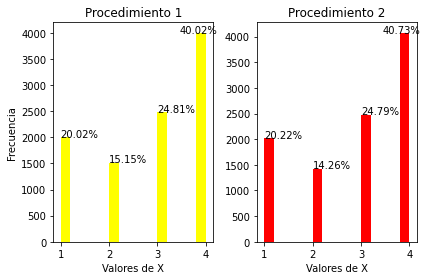

In [ ]:
import pandas as pd
from random import uniform
import matplotlib.pyplot as plt
from time import time

'''
Los resultados del primer procedimiento se guardan
en la lista Resultados1 y los resultados
del segundo procedimiento se guardan en la lista
Resultados2
'''

Resultados1 = []
Resultados2 = []

Inicio1 = time()
for Iteracion1 in range (10000):
  NumeroAleatorio = uniform(0,1)
  if NumeroAleatorio < 0.20:
    Resultados1.append(1)
  elif NumeroAleatorio < 0.35:
    Resultados1.append(2)
  elif NumeroAleatorio < 0.60:
    Resultados1.append(3)
  else:
    Resultados1.append(4)
Fin1 = time()
Inicio2 = time()
for Iteracion2 in range (10000):
  N = uniform(0,1)
  if N<0.40:
    Resultados2.append(4)
  elif N<0.65:
    Resultados2.append(3)
  elif N<0.85:
    Resultados2.append(1)
  else:
    Resultados2.append(2)
Fin2 = time()
'''
Los resultados del primer procedimiento lo almacenamos en
el Data Frame DF1 y los resultados del segundo procedimiento
lo almacenamos en el Data Frame DF2.
'''

DF1 = pd.DataFrame({'Valor X':Resultados1})
DF2 = pd.DataFrame({'Valor X':Resultados2})


plt.subplot(121)

#DATOS GRAFICA 1

plt.hist(DF1.loc[:,'Valor X'],bins = 15,color = 'yellow')
for j in range (1,5):
    if j == 4:
        plt.text(3.45,list(DF1.iloc[:,0]).count(4),str( ((list(DF1.iloc[:,0]).count(4))/10000)*100 )[0:5]+'%' )
        break
    plt.text(j,list(DF1.iloc[:,0]).count(j),str( ((list(DF1.iloc[:,0]).count(j))/10000)*100 )[0:5]+'%')
plt.title('Procedimiento 1')
plt.ylabel('Frecuencia')
plt.xlabel('Valores de X')
plt.tight_layout()

plt.subplot(122)

#DATOS GRAFICA 2

DF2 = pd.DataFrame({'Valor X':Resultados2})
plt.hist(DF2.loc[:,'Valor X'],bins = 15,color = 'red')
for j in range (1,5):
    if j == 4:
        plt.text(3.45,list(DF2.iloc[:,0]).count(4),str( ((list(DF2.iloc[:,0]).count(4))/10000)*100 )[0:5]+'%' )
        break
    plt.text(j,list(DF2.iloc[:,0]).count(j),str( ((list(DF2.iloc[:,0]).count(j))/10000)*100 )[0:5]+'%')
plt.title('Procedimiento 2')
plt.xlabel('Valores de X')
plt.tight_layout()

In [ ]:
print('Tiempo de ejecucion del primer procedimiento',Fin1-Inicio1,'\nTiempo de ejecucion del segundo procedimiento',Fin2-Inicio2)

Tiempo de ejecucion del primer procedimiento 0.006545305252075195 
Tiempo de ejecucion del segundo procedimiento 0.0055694580078125


##Generación de variable aleatoria discreta uniforme

Un caso en el que no es necesario buscar el intervalo adecuado en el cual se encuentra el número aleatorio es cuando la variable aleatoria deseada es una variable aleatoria discreta uniforme.

Suponga que queremos el valor de $X$ entre los valores $1,\ldots ,n$, cada uno igualmente probable, i.e

$$P\{X = j\}=\frac{1}{n},j = 1,\ldots,nx$$

El resultado anterior implica que podemos lograr esto al generar $U$ y luego

$$X = j \text{ sí }j-1<nU<j$$

Del cual $X = \left[nU\right]+1$

In [ ]:
def Generacion_Variable_Aleatoria_Discreta_Uniforme (U,n):
  '''
  U es la cantidad de variables aleatorias discretas uniformemente distribuidas entre 0 y 1

  n indica el maximo del rango de valores a tomar de X, esto es: 1,...,n
  '''
  #IMPORTAMOS LIBRERIAS
  from random import uniform
  import pandas as pd
  #DEFINIMOS UNA LISTA QUE CONTENGA CADA X = [nU]+1
  L = []
  for j in range (U):
    L.append(int(n*uniform(0,1))+1)
  return L

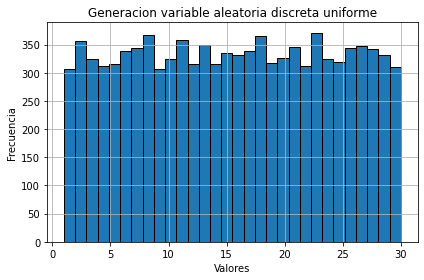

In [ ]:
import matplotlib.pyplot as plt

#HACEMOS U = 10,000 Y n = 30.

plt.hist(Generacion_Variable_Aleatoria_Discreta_Uniforme(10000,30),bins = 30,edgecolor = 'black')
plt.title('Generacion variable aleatoria discreta uniforme')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.grid()
plt.tight_layout()

## Generación de una permutación

Si deseamos permutar $N$ elementos en $n$ entonces realizamos el siguiente código Python.

In [ ]:
from itertools import permutations  #LA LIBRERIA itertools CONTIENE LA FUNCION permutations

#permutations RECIBE DOS ARGUMENTOS
# ARGUMENTO 1 : UNA LISTA QUE CONTIENE LOS ELEMENTOS A PERMUTAR
# ARGUMENTO 2 : EL NUMERO DE ELEMENTOS A PERMUTAR, EL n

#DEFINIMOS UNA LISTA QUE CONTENGA LOS PRIMEROS 20 ENTEROS POSITIVOS

L2 = list(range(1,21))

#PERMUTAREMOS LA LISTA ANTERIOR EN 5 ELEMENTOS Y LO CONVERTIMOS A LISTA EL RESULTADO

Per = list(permutations(L2,5))

#DEFINIMOS UN CICLO PARA VISUALIZAR LOS PRIMEROS 6 ELEMENTOS PERMUTADOS

for i in range (0,6):
  print('La permutacion',i+1,'es',Per[i],'\n')

#PARA SABER EL NUMERO DE PERMUTACIONES SOLO OBTENEMOS LA LONGITUD DE LA LISTA Per

print('El numero de permutaciones de L2 en 5 es',len(Per))

La permutacion 1 es (1, 2, 3, 4, 5) 

La permutacion 2 es (1, 2, 3, 4, 6) 

La permutacion 3 es (1, 2, 3, 4, 7) 

La permutacion 4 es (1, 2, 3, 4, 8) 

La permutacion 5 es (1, 2, 3, 4, 9) 

La permutacion 6 es (1, 2, 3, 4, 10) 

El numero de permutaciones de L2 en 5 es 1860480


## Generación de una permutación aleatoria

Suponga que estamos interesados en generar una permutación de los números $1,2,\ldots, n$ tal que todos los $n!$ posibles ordenamientos sean igualmente probables.

El código Python para realizar esto es el siguiente.

In [ ]:
from random import sample #LA LIBRERIA random CONTIENE LA FUNCION sample

#sample RECIBE DOS ARGUMENTOS
# ARGUMENTO 1 : UNA LISTA QUE CONTIENE LOS ELEMENTOS A ALEATORIZAR
# ARGUMENTO 2 : EL NUMERO DE ELEMENTOS DE LA LISTA DADA PARA ALEATORIZAR

#DEFINIMOS UNA LISTA QUE CONTENGA LOS PRIMEROS 6 ENTEROS POSITIVOS.

L = list(range(1,7))

#CREAMOS UN CICLO for DONDE CADA ITERACION MARCA EL NUMERO DE ELEMENTOS A ALEATORIZAR DE LA LISTA

for i in range (1,7):
  print('La permutacion aleatoria de',i,'elementos es',sample(L,i)) # i<= len(L)

#SI DESEA GENERAR UNA PERMUTACION ALEATORIA DE CUALQUIER OTRO CONJUNTO DE ELEMENTOS
#SOLO MODIFIQUE LA LISTA

La permutacion aleatoria de 1 elementos es [1]
La permutacion aleatoria de 2 elementos es [1, 2]
La permutacion aleatoria de 3 elementos es [3, 5, 4]
La permutacion aleatoria de 4 elementos es [6, 1, 5, 2]
La permutacion aleatoria de 5 elementos es [4, 3, 2, 5, 1]
La permutacion aleatoria de 6 elementos es [3, 5, 4, 1, 6, 2]


## Generación de una variable aleatoria de Poisson

La variable aleatoria $X$ es Poisson con media $\lambda$ sí

$$p_i = P\{X = i\} = e^{-\lambda}\frac{\lambda^{i}}{i!},\text{  }i\in \left(\mathbb N\cup{0}\right)$$

La clave para aplicar el método de la transformada inversa para generar esta variable aleatoria es la siguiente identidad.

$$P_{i+1} = \frac{\lambda}{i+1}\cdot p_i,\text{  } i\geq0$$

Esta recursión de probabilidad se utilizar en el siguiente algoritmo, tomando $\lambda$ como usted desee :

|Pasos|Instruccion|
|--|--|
|1|Generar un número aleatorio discreto distribuido uniformemente entre 0 y 1|
|2|Hace $i = 0, p = e^{-\lambda}, F = p$.|
|3|Verifica que $U < F$, en caso afirmativo hacemos entonces $X = i$ y terminamos el ciclo.|
|4|En caso de que $U\geq F$ hacemos $p = \frac{\lambda\cdot p}{i+1},F = F + p, i = i + 1$|
|5|Repetimos el paso 3|

Valores de X
0               381
1               372
2               182
3                51
4                12
5                 2
dtype: int64


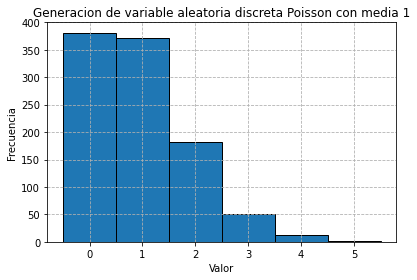

In [ ]:
def Generacion_Variable_Aleatoria_Discreta_Poisson (Media_Lambda):
  '''
  Media_Lambda es el valor de la Lambda en la distribucion Poisson, este
  valor es dado por el usuario.

  N es la cantidad de numeros a evaluar.
  '''
  #IMPORTAMOS LIBRERIAS
  from random import uniform
  from math import exp
  #PASO 1 : GENERAMOS EL VALOR ALEATORIO UNIFORMEMENTE DISTRIBUIDO ENTRE 0 Y 1
  U = uniform(0,1) 
  #PASO 2
  i = 0
  p = exp(-Media_Lambda)
  F = p
  #PASO 4
  while U >= F:
    p = (Media_Lambda*p)/(i+1)
    F = F + p
    i += 1
  #PASO 3
  return i

import pandas as pd
import matplotlib.pyplot as plt
Lista = list(Generacion_Variable_Aleatoria_Discreta_Poisson(1) for j in range (1000))
DF = pd.DataFrame({'Valores de X':Lista})
Valores = DF.value_counts()
print(Valores)
Y = list(int(Valores[ValoresY]) for ValoresY in range (len(Valores)))
X = list(str(ValoresX) for ValoresX in range (len(Valores)))
plt.bar(X,Y,width = 1,edgecolor = 'black')
plt.title('Generacion de variable aleatoria discreta Poisson con media 1')
plt.ylabel('Frecuencia')
plt.xlabel('Valor')
plt.grid(linestyle = '--')
plt.tight_layout()

## Generación de variables Binomiales

Suponga que queremos generar el valor de $X$, una variable aleatoria binomial $(n,p)$; es decir, $X$ tal que

$$P\{X = i\} = \frac{n!}{i!(n-i)!}\cdot p^{i}(1-p)^{n-i},\text{  }i=0,\ldots,n$$

Para esto, nos valemos del método de la transformada inversa y de la identidad recursiva.

$$P\{X = i + 1\} = \frac{n-i}{1+i}\cdot \frac{p}{1-p}\cdot P\{X = i\}$$

Sí $i$ denota el valor en cuestión, note que $pr =  P\{X = i\}$ la probabilidad de que $X$ sea igual a $i$, y $F = F(i)$ la probabilidad de que $X\leq i$, el algoritmo se puede expresar de la siguiente manera.

|Pasos|Instruccion|
|--|--|
|1|Generar un número aleatorio discreto distribuido uniformemente entre 0 y 1|
|2|Hace $c=\frac{p}{1-p},i=0,pr=(1-p)^n,F=pr$|
|3|Verifica que $U < F$, en caso afirmativo hacemos entonces $X = i$ y terminamos el ciclo.|
|4|En caso de que $U\geq F$ hacemos $pr = \frac{c(n-i)}{i+1}\cdot pr, F = F + pr, i = i + 1$|
|5|Repetimos el paso 3|

En general la distribución binomial describe el comportamiento de una variable $X$ que cuenta número de éxitos tal que: 

* El número de observaciones $n$ es fijo.

* Cada observación es independiente

* Cada observación representa uno de dos posibles eventos (éxito o fracaso)

* La probabilidad de éxito $p$ es la misma en cada observación

In [ ]:
#EN PYTHON LA LIBRERIA NumPy CONTIENE LA FUNCION BINOMIAL QUE NOS AYUDA CON ESTE TRABAJO
import numpy as np

#GENERAMOS UNA LISTA QUE CONTEGNA 50000 OBSERVACIONES DEL CUAL EXTRAEMOS 50 CON
#UNA PROBABILIDAD DE 0.5

Datos_Binomiales = list(np.random.binomial(50,0.5,50000))

#GENERAMOS UN DF PARA PODER GRAFICAR ESTOS DATOS EN UNA GRAFICA DE BARRAS

import pandas as pd

DF = pd.DataFrame({'Datos Binomiales':Datos_Binomiales})

#EXTRAEMOS DE DF.value_counts() LOS NOMBRES DE LAS FILAS, PUES ES SERIE,
#DE TAL MANERA QUE LOS METEMOS EN UNA LISTA Y LUEGO VAMOS EXTRAYENDO CADA 
#UNO DE LOS ELEMENTOS DE ESTA LISTA, LUEGO EXTRAEMOS EL PRIMER ELEMENTO.

X = list(list(DF.value_counts().index)[i][0] for i in range (len(list(DF.value_counts().index))))

#REACOMODAMOS LA LISTA X
X.sort()

#EXTRAEMOS LOS VALORES DE CADA UNA DE LAS FILAS DE LA SERIE DF.value_counts()

#NOTA : EN ALGUNAS ITERACIONES SE TIENE UN SALTO DE 1 O 2 ELEMENTOS 
#LO CUAL GENERA UN ERROR, EN CASO DE QUE GENERE UN ERROR SE RECOMIENDA SOLAMENTE VOLVER 
#A CORRER ESTE CHUNK
Y = list(int(DF.value_counts()[ValoresY]) for ValoresY in range( min(X),max(X) + 1)   )

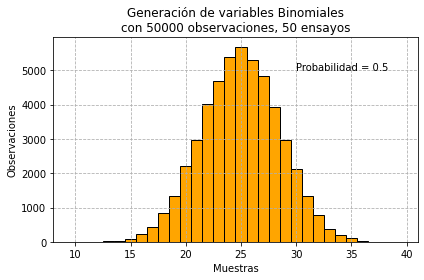

In [ ]:
import matplotlib.pyplot as plt

plt.bar(X,Y,edgecolor = 'black',width=1,color = 'orange')
plt.grid(linestyle = '--')
plt.title('Generación de variables Binomiales\ncon 50000 observaciones, 50 ensayos')
plt.xlabel('Muestras')
plt.ylabel('Observaciones')
plt.text(30,5000,'Probabilidad = 0.5')
plt.tight_layout()

## La técnica de aceptación y rechazo

Suponga que tenemos un método eficiente para simular una variable aleatoria con función de masa de probabilidad $\{q_j,j\geq 0\}$.

Podemos emplearlo como la base para simular a partir de la distribución que tiene función de masa $\{p_j,j\geq 0\}$ primero simulando una variable $Y$ aleatoria con función de masa $\{q_j\}$ y luego aceptar este valor simulado con una probabilidad proporcional a $\frac{p_Y}{q_Y}$.

Específicamente, sea $c$ una constante tal que

$$\frac{p_j}{q_j}\leq c,\forall j\text{ tal que }p_j>0$$

Ahora tenemos la siguiente técnica, llamada **método de rechazo**, para simular una variable aleatoria $X$ con función de masa $p_j = P\{X=j\}$.

**Método de rechazo**

|Pasos|Instruccion|
|--|--|
|1|Simular el valor de $Y$, con función de masa de probabilidad $q_j$.|
|2|Generar un número aleatorio $U$ distribuido uniformemente entre $(0,1)$|
|3|Sí $U<\frac{p_Y}{c\cdot q_Y}$ hacemos $X = Y$ y terminamos.|
|4|En caso de que $U\geq \frac{p_Y}{c\cdot q_Y}$ regresamos al paso 1|

Tenemos que este algoritmo tiene en promedio $c$ iteraciones para obtener el valor generado de $X$.

**EJEMPLO**

Supongamos que queremos simular el valor de una variable aleatoria $X$ que toma uno de los valores $1,2,3,4$ con probabilidades $p_1 = 0.20, p_2 = 0.15, p_3 = 0.25, p_4 = 0.40$, donde $p_j = P\{X = j\}$.

Usando el método de aceptación y rechazo sí $q$ es la densidad uniforme en $\{1,\ldots,4\}$.

In [ ]:
def Funcion_Aceptacion_Rechazo_Variables_Aleatorias_Uniformes (Lista_Probabilidades):
  from random import uniform
  from math import ceil
  p_j = Lista_Probabilidades #Ponemos en una lista las probabilidades
  c = max(p_j)/(1/len(p_j)) #c es la division del maximo de la probabilidades y 1/longitud de p_j
  U = ceil(len(p_j)*uniform(0,1)) #U es el techo del producto de la longitud de p_j por un U
  while uniform(0,1) > p_j[U-1]/(c*(1/len(p_j))): 
    U = ceil(len(p_j)*uniform(0,1))
  return U

In [ ]:
Valores = list(Funcion_Aceptacion_Rechazo_Variables_Aleatorias_Uniformes([0.20,0.15,0.25,0.40]) for i in range (100000))
DF_V = pd.DataFrame({'Valores':Valores})
G = (DF_V.value_counts()/100000)*100
print('Porcentaje de frecuencia','\n',G)

Porcentaje de frecuencia 
 Valores
4          39.988
3          24.941
1          19.957
2          15.114
dtype: float64


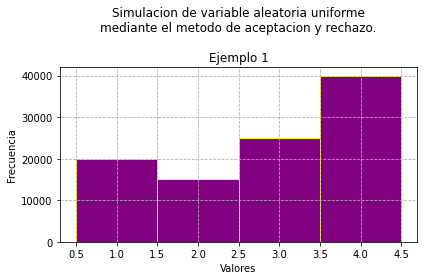

In [ ]:
Y = list(int(DF_V.value_counts()[i]) for i in range (1,len(DF_V.value_counts())+1 ))
X = list(j for j in range (1,len(DF_V.value_counts())+1 ))
plt.bar(X,Y,width=1,edgecolor = 'yellow',color = 'purple')
plt.grid(linestyle = '--')
plt.title('Simulacion de variable aleatoria uniforme\nmediante el metodo de aceptacion y rechazo.\n\nEjemplo 1')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.tight_layout()

**EJEMPLO**

Suponga que queremos simular el valor de una variable aleatoria $X$:

|Valores de X|1|2|3|4|5|6|7|8|9|10|
|--|--|--|--|--|--|--|--|--|--|--|
|Probabilidades|0.11|0.12|0.09|0.08|0.12|0.10|0.09|0.09|0.10|0.10|

Utilizando el método de rechazo, si $q$ como la densidad uniforme discreta en $\{1,\ldots,10\}$.

In [ ]:
Valores = list(Funcion_Aceptacion_Rechazo_Variables_Aleatorias_Uniformes([0.11,0.12,0.09,0.08,0.12,0.10,0.09,0.09,0.10,0.10]) for i in range (100000))
DF_V = pd.DataFrame({'Valores':Valores})
G = (DF_V.value_counts()/100000)*100
print('Porcentaje de frecuencia','\n',G)

Porcentaje de frecuencia 
 Valores
5          12.112
2          12.006
1          11.109
6          10.015
10          9.929
9           9.813
3           9.038
8           9.035
7           8.859
4           8.084
dtype: float64


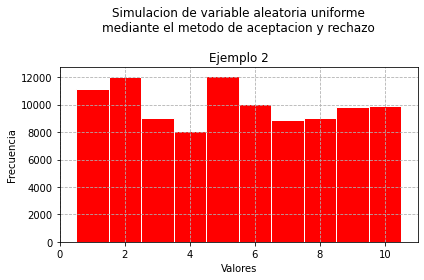

In [ ]:
Y = list(int(DF_V.value_counts()[i]) for i in range (1, len(DF_V.value_counts())+1 ))
X = list(j for j in range (1,len(DF_V.value_counts())+1 ))
plt.bar(X,Y,width=1,edgecolor = 'white',color = 'red')
plt.grid(linestyle = '--')
plt.title('Simulacion de variable aleatoria uniforme\nmediante el metodo de aceptacion y rechazo\n\nEjemplo 2')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.tight_layout()

**EJEMPLO**

Retomando el primer ejemplo visto en este COLAB podemos ver que se cumple la misma distribución.

Si queremos simular una variable aleatoria $X$ tal que

|$$i$$|$$p_i$$|
|--|--|
|$$1$$|$$0.20$$|
|$$2$$|$$0.15$$|
|$$3$$|$$0.25$$|
|$$4$$|$$0.40$$|


In [ ]:
Valores = list(Funcion_Aceptacion_Rechazo_Variables_Aleatorias_Uniformes([0.20,0.15,0.25,0.40]) for i in range (100000))
DF_V = pd.DataFrame({'Valores':Valores})
G = (DF_V.value_counts()/100000)*100
print('Porcentaje de frecuencia','\n',G)

Porcentaje de frecuencia 
 Valores
4          39.915
3          25.021
1          20.158
2          14.906
dtype: float64


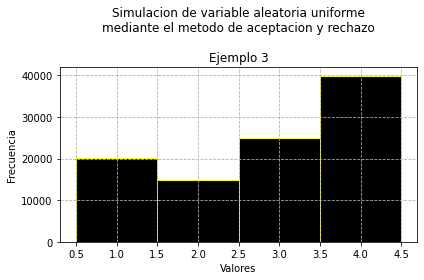

In [ ]:
Y = list(int(DF_V.value_counts()[i]) for i in range (1, len(DF_V.value_counts())+1 ))
X = list(j for j in range (1,len(DF_V.value_counts())+1 ))
plt.bar(X,Y,width=1,edgecolor = 'yellow',color = 'black')
plt.grid(linestyle = '--')
plt.title('Simulacion de variable aleatoria uniforme\nmediante el metodo de aceptacion y rechazo\n\nEjemplo 3')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.tight_layout()